In [161]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
np.random.seed(0)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


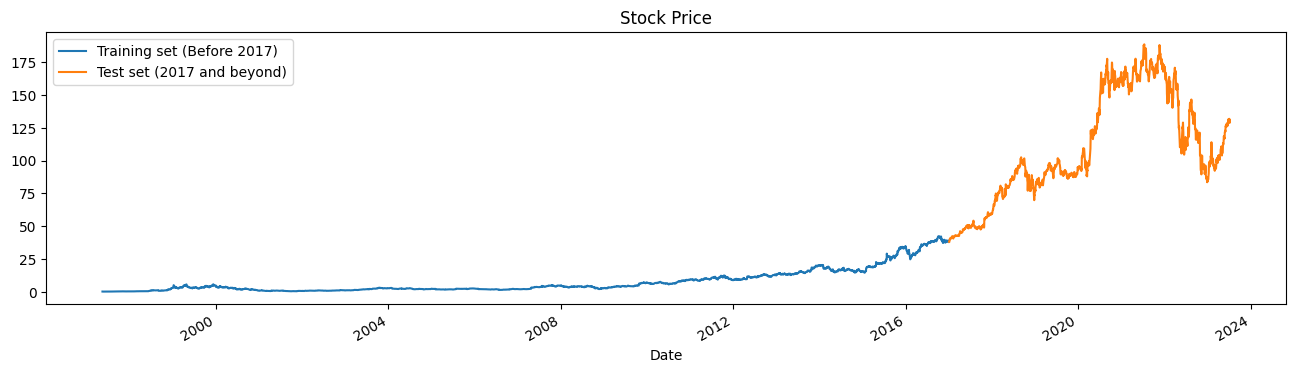

In [162]:
dataset = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=['Date'])
display(dataset.head())

# We are going to predict the high attribute of stocks. Let's visualize it
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Stock Price')
plt.show()

In [163]:
dataset.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [164]:
rowswithnull =dataset[dataset.isnull().any(axis=1)]
rowswithnull.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [165]:
rowswithoutnulls = dataset[dataset.notnull().all(axis=1)]
rowswithoutnulls.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [166]:
dataset = rowswithoutnulls
rowswithoutnulls.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [167]:
train_set = dataset[:'2016']["High"].values
test_set = dataset['2017':]["High"].values
print(train_set.shape, test_set.shape)

(4941,) (1638,)


In [168]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_set = scaler.fit_transform(np.reshape(train_set, (-1, 1)))
test_set = scaler.fit_transform(np.reshape(test_set, (-1, 1)))

sequence_length = 20
X_train, Y_train = list(), list()
for i in range(train_set.shape[0] - sequence_length):
    X_train.append(train_set[i:i + sequence_length, 0])
    Y_train.append(train_set[i + sequence_length, 0])
X_train, Y_train = np.asarray(X_train), np.asarray(Y_train)

X_test, Y_test = list(), list()
for i in range(test_set.shape[0] - sequence_length):
    X_test.append(test_set[i:i + sequence_length, 0])
    Y_test.append(test_set[i + sequence_length, 0])
X_test, Y_test = np.asarray(X_test), np.asarray(Y_test)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4921, 20) (1618, 20)
(4921,) (1618,)


In [169]:
model = Sequential([
        LSTM(60, input_shape = (sequence_length,1), activation = 'tanh'),
        Dense(units = 64, activation="relu"),
        Dropout(0.1),
        Dense(units = 1, activation = 'relu'),
    ]) 

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60)                14880     
                                                                 
 dense_20 (Dense)            (None, 64)                3904      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18849 (73.63 KB)
Trainable params: 18849 (73.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [170]:
history = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs= 30, batch_size = 4)
loss_history = history.history['loss']

Epoch 1/30
1231/1231 [==============================] - 4s 3ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2/30
1231/1231 [==============================] - 3s 3ms/step - loss: 5.8874e-04 - val_loss: 0.0015
Epoch 3/30
1231/1231 [==============================] - 3s 3ms/step - loss: 5.7425e-04 - val_loss: 3.9941e-04
Epoch 4/30
1231/1231 [==============================] - 3s 3ms/step - loss: 4.3532e-04 - val_loss: 3.7514e-04
Epoch 5/30
1231/1231 [==============================] - 3s 2ms/step - loss: 4.1428e-04 - val_loss: 5.2585e-04
Epoch 6/30
1231/1231 [==============================] - 3s 2ms/step - loss: 4.2358e-04 - val_loss: 3.7379e-04
Epoch 7/30
1231/1231 [==============================] - 3s 3ms/step - loss: 3.8110e-04 - val_loss: 9.5257e-04
Epoch 8/30
1231/1231 [==============================] - 3s 2ms/step - loss: 4.2115e-04 - val_loss: 9.5319e-04
Epoch 9/30
1231/1231 [==============================] - 3s 2ms/step - loss: 4.0199e-04 - val_loss: 2.6466e-04
Epoch 10/30
1231/1231 

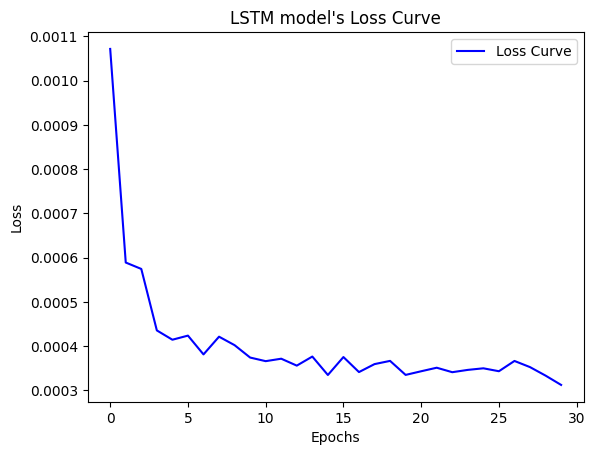

In [171]:
plt.plot(loss_history, color = 'blue', label = 'Loss Curve')
plt.title('LSTM model\'s Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

51/51 [==============================] - 0s 1ms/step


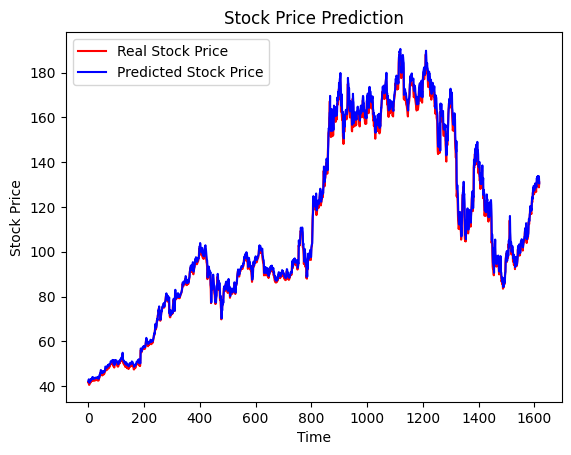

In [172]:
test_predict = model.predict(X_test)
orgpredict = scaler.inverse_transform(test_predict)
y_test_org =scaler.inverse_transform(Y_test.reshape(-1, 1))
plt.plot(y_test_org, color='red',label='Real Stock Price')
plt.plot(orgpredict, color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

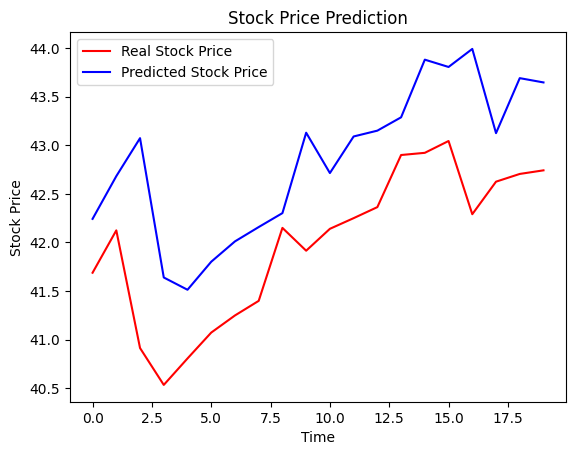

In [173]:
plt.plot(y_test_org[:20], color='red',label='Real Stock Price')
plt.plot(orgpredict[:20], color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [174]:
loss = (np.sum(np.square(Y_test - np.squeeze(test_predict)))/len(test_predict))
print("Loss: ",loss)

Loss:  0.0003423424813173631


In [175]:
r_squared = r2_score(Y_test[:20], np.squeeze(test_predict[:20]))
print("R-squared:", r_squared)

R-squared: -0.6500451134974794


In [176]:
y_pred = orgpredict[:20]
y_true = y_test_org[:20]
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

mae = mean_absolute_error(y_true, y_pred)
mdape = median_absolute_percentage_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Percentage Error (MdAPE):", mdape)
print("Root mean square error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.8540742675781253
Median Absolute Percentage Error (MdAPE): 1.8388431061397716
Root mean square error (RMSE): 0.9587999219130664
